# Synthetic data - Scatter Plot



### Model
* Keras - 1 layer Model   (17 > 1)

### Train
* X_train (17, 1)
* Y_train (17,)


In [2]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

### Data

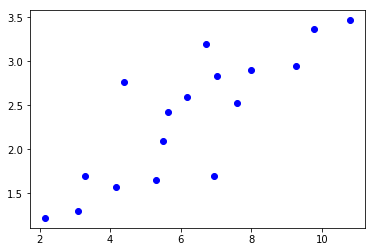

In [4]:
# Training Data
X_train = np.asarray([[3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]]).T
Y_train = np.asarray([[1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]]).T
plt.plot(X_train, Y_train, 'bo', label='Original data')

### Model

In [5]:
# Parameters 
learning_rate = 0.01
training_epochs = 100
display_step = 50

In [11]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(X_train.shape[1],))  
  ])

  optimizer = tf.train.GradientDescentOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
# training
history = model.fit(X_train, Y_train, epochs=training_epochs, validation_split=0.2, verbose=0)

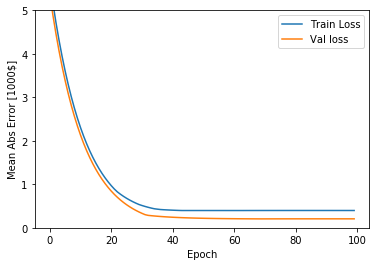

In [13]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])
  
plot_history(history)

In [14]:
[loss, mae] = model.evaluate(X_train, Y_train, verbose=0)
print("loss: {}".format(loss))
print("mae: {}".format(mae))

loss: 0.2072599083185196
mae: 0.3528268337249756


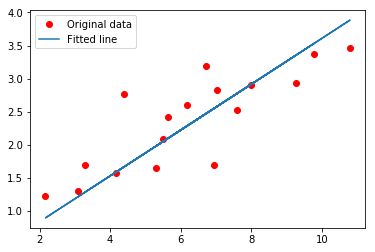

In [15]:
plt.plot(X_train, Y_train, 'ro', label='Original data')
plt.plot(X_train,  model.get_weights()[0] * X_train +  model.get_weights()[1], label='Fitted line')
plt.legend()
plt.show()